In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import collections
import math 
import numpy as np
import statsmodels.api as sm
lowess = sm.nonparametric.lowess


RMSD_sim = os.listdir('../todos_los_frames/RMSD/')
RMSD_sim=sorted(RMSD_sim,key=len)

sim_RMSD_df=pd.DataFrame({})
n=0
for i in RMSD_sim:
    if(i.split('.')[-1]=='xvg'):
        #print(i)
        with open('../todos_los_frames/RMSD/'+i) as f:
            data = f.read()
            data = data.split('\n')
        sim_temp=[]
        
        for i in range(len(data[18:])-1):
            valor=float(data[18:][i][15:])
            sim_temp.append(valor)
        
        sim_RMSD_df.insert(n,'Rmsd_'+str(n),sim_temp)  
        n=n+1


print('Rmsd')
sim_min=sim_RMSD_df[min(sim_RMSD_df)].min()
sim_max=sim_RMSD_df[max(sim_RMSD_df)].max()
print('max:',sim_max)
print('min:',sim_min)

sim_rmsd_nom=((sim_RMSD_df[:]-sim_min)/(sim_max-sim_min))

Rmsd
max: 1.6524644
min: 0.0


<function matplotlib.pyplot.show(*args, **kw)>

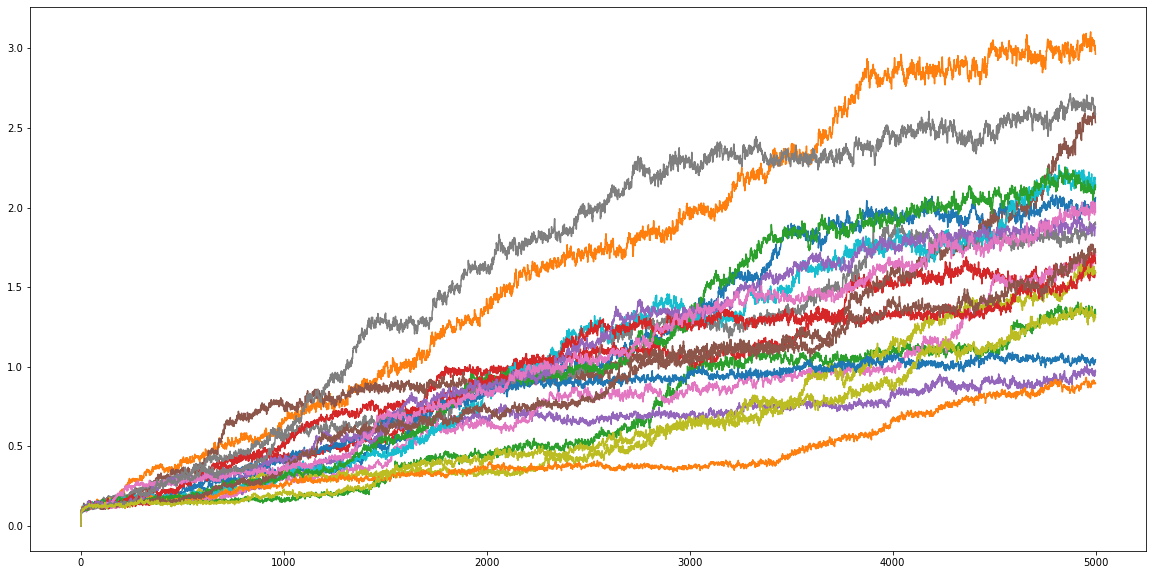

In [3]:
plt.figure(figsize=(20,10))
for i in range(len(list(sim_RMSD_df))-1):
    plt.plot(sim_RMSD_df[list(sim_RMSD_df)[i+1]][0:5000])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

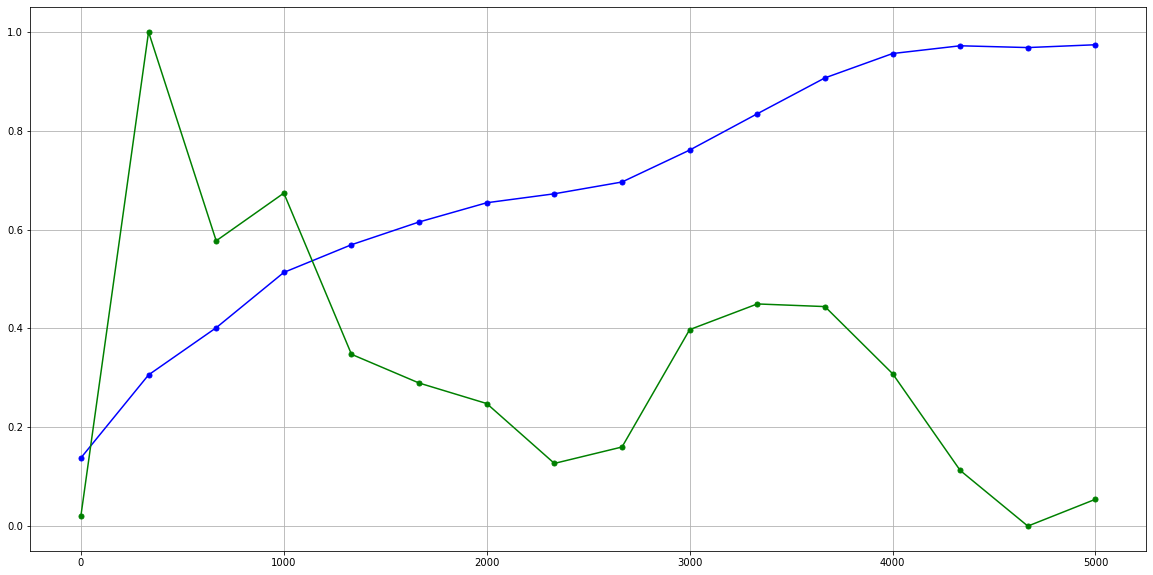

In [6]:
#promedio n puntos
plt.figure(figsize=(20,10))
dato=[]
a=0
d=0
prom=300 #promedio de n

for i in sim_RMSD_df['Rmsd_0']:
    d=d+i
    if a==prom:
        dato.append(d/a)
        #print(d/a)
        a=0
        d=0
    a=a+1
dt = np.linspace(0, 5000, int(5000/prom)) 
dt_col = np.linspace(0, 5000, int(5000/prom)) 


#pendiente
col_df=pd.DataFrame({})
col=[]
col.append(0)
for i in range(len(dato)-1):
        y1=dato[i]
        y2=dato[i+1]
        m=(y2-y1)/2
        col.append(m)
col_df.insert(0,'0',col)  

#norm

sim_min=col_df['0'].min()
sim_max=col_df['0'].max()
col_df_nom=((col_df[:]-sim_min)/(sim_max-sim_min))


#plt
plt.grid()
#plt.plot(sim_RMSD_df['Rmsd_0'],"-ro", markersize=1)
plt.plot(dt,dato,"-bo", markersize=5)
plt.plot(dt,col_df_nom,"-go", markersize=5)

plt.show

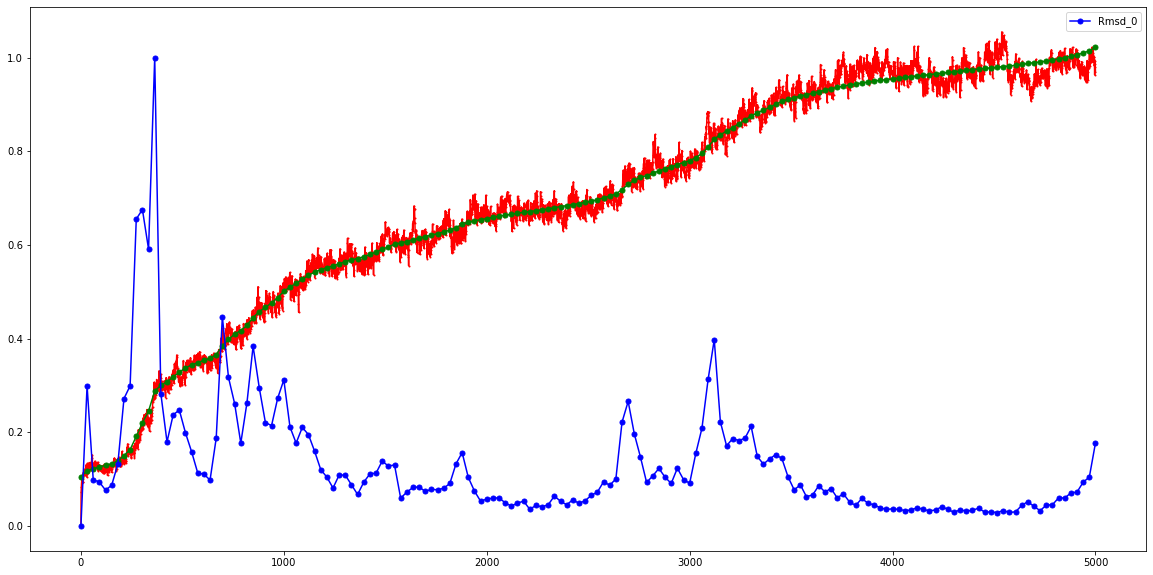

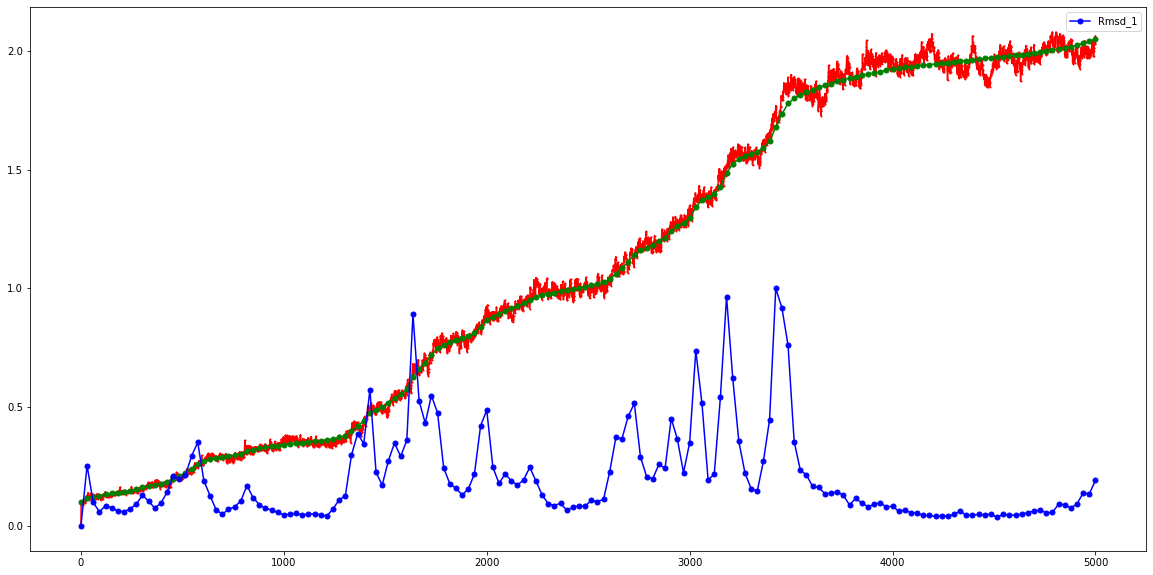

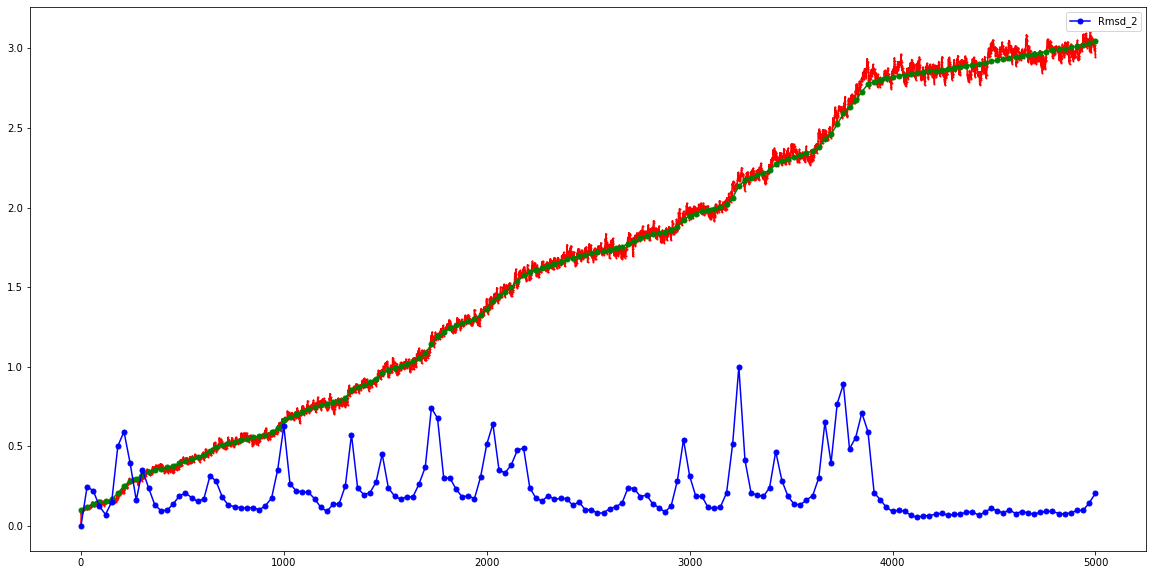

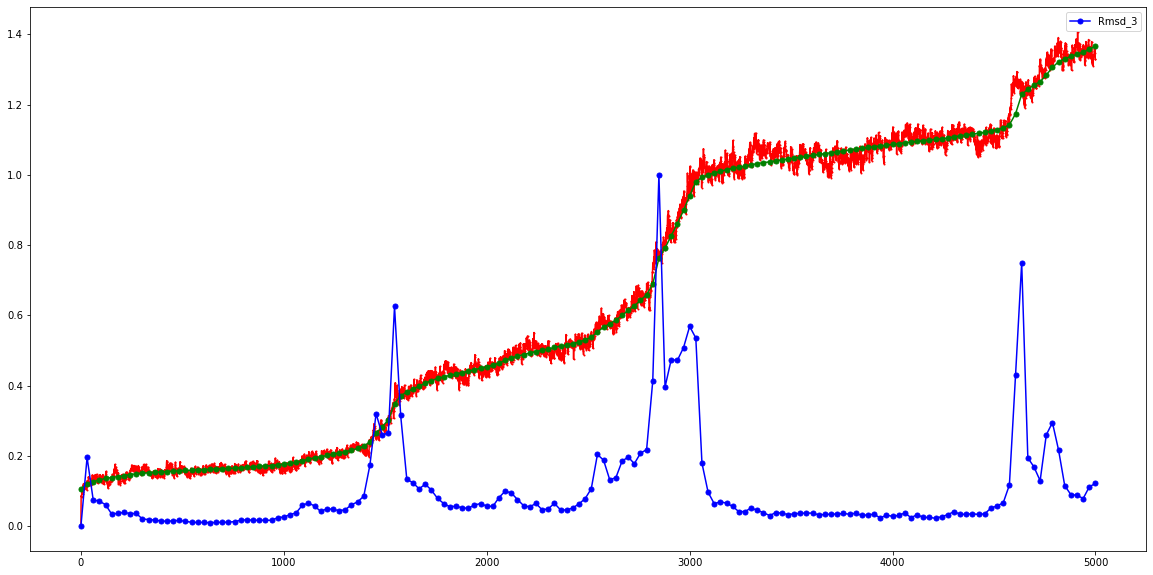

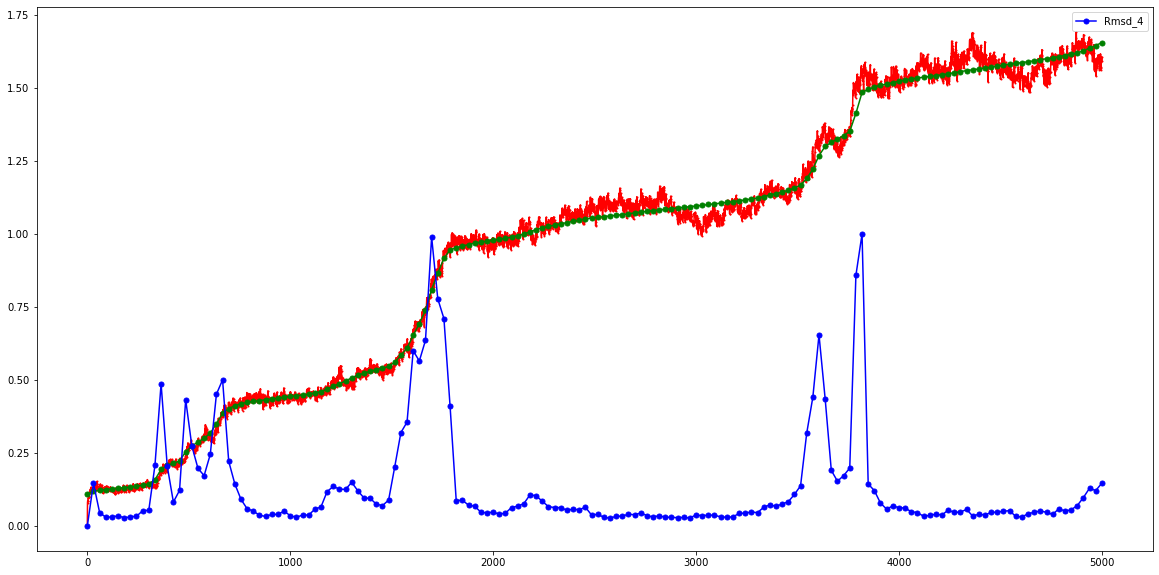

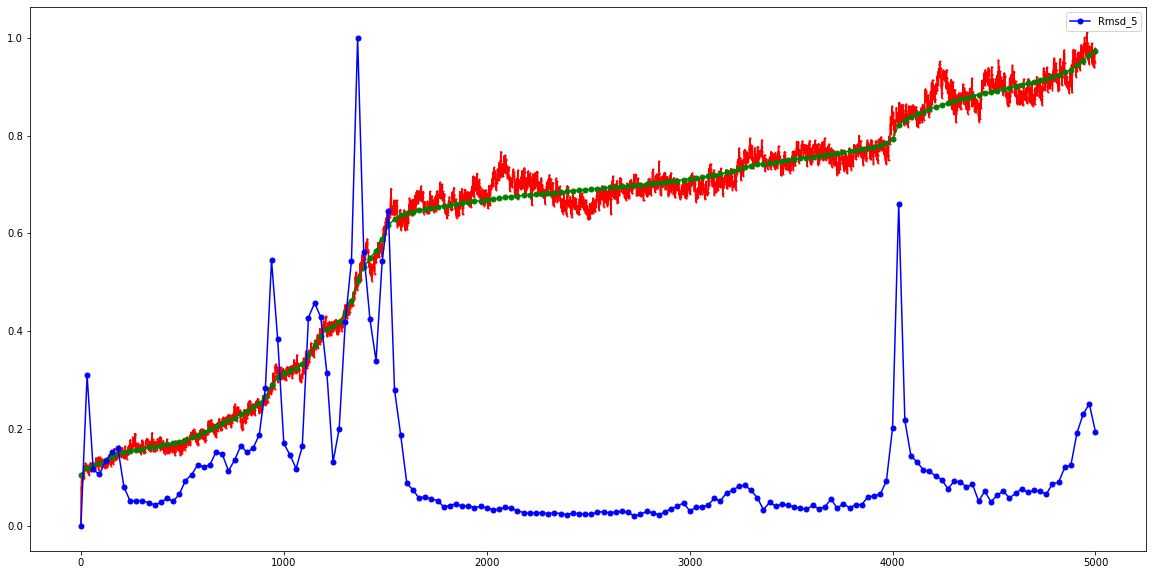

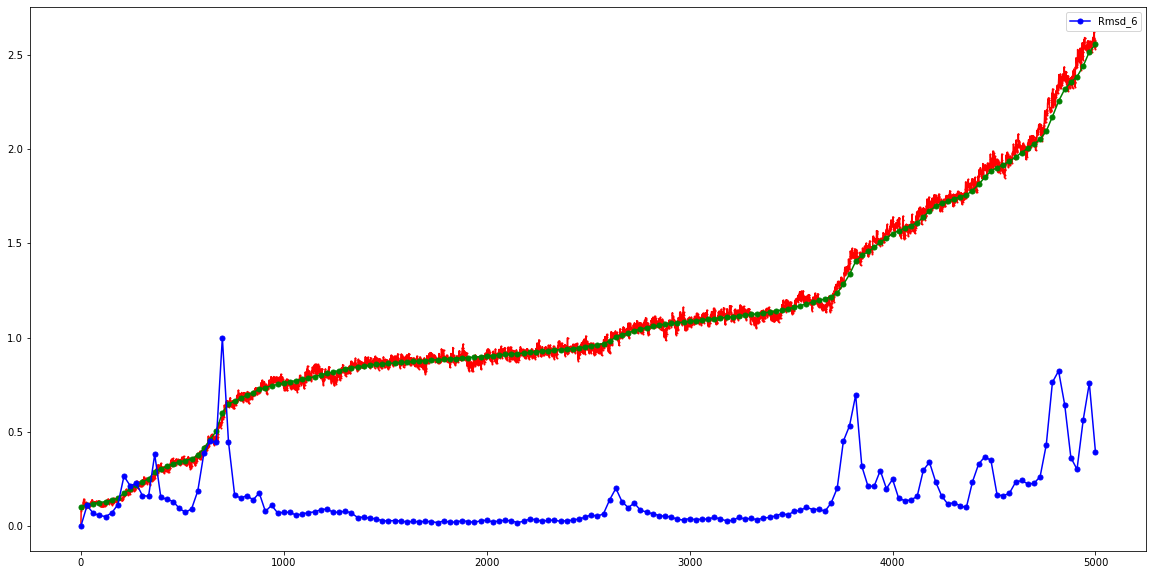

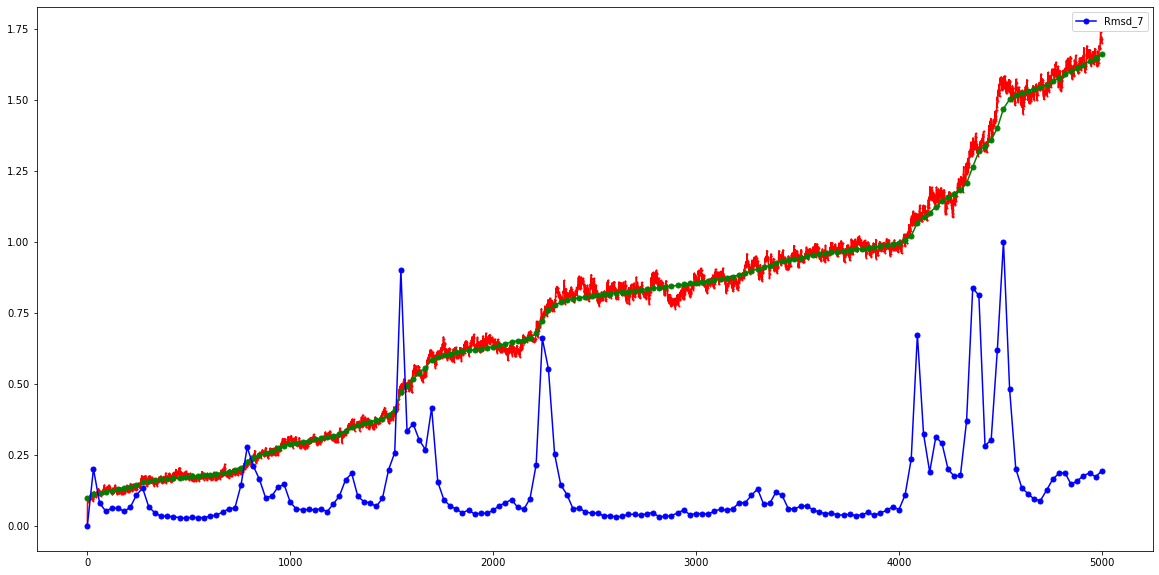

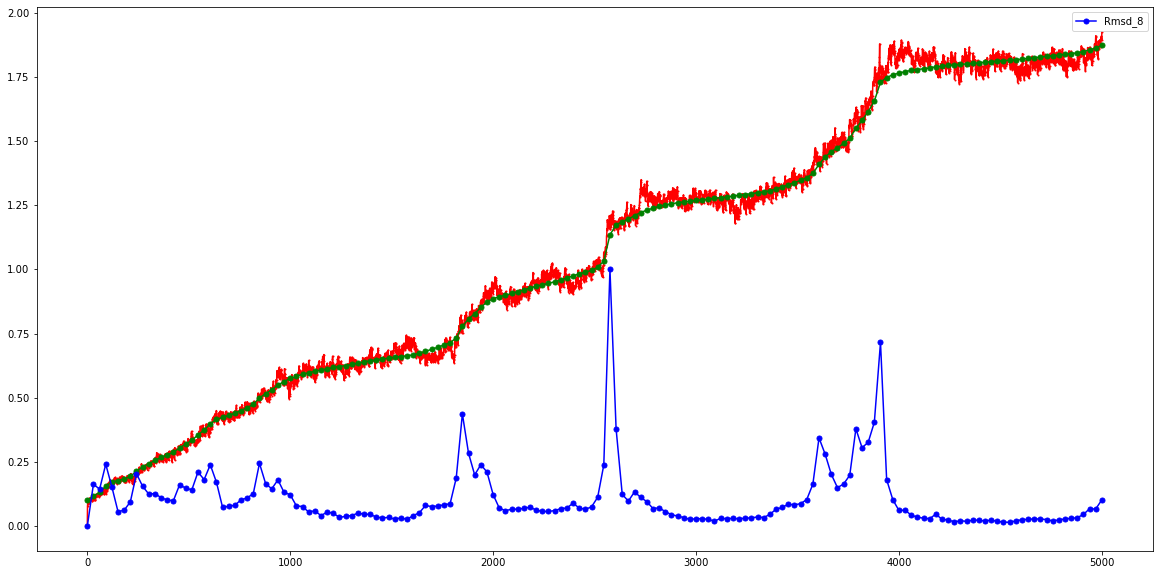

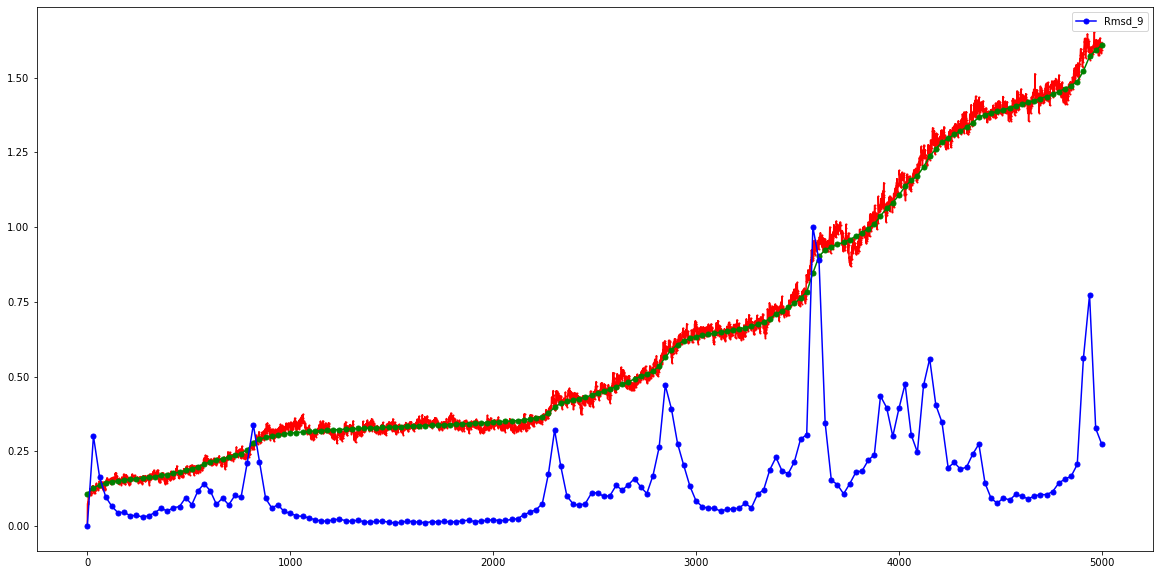

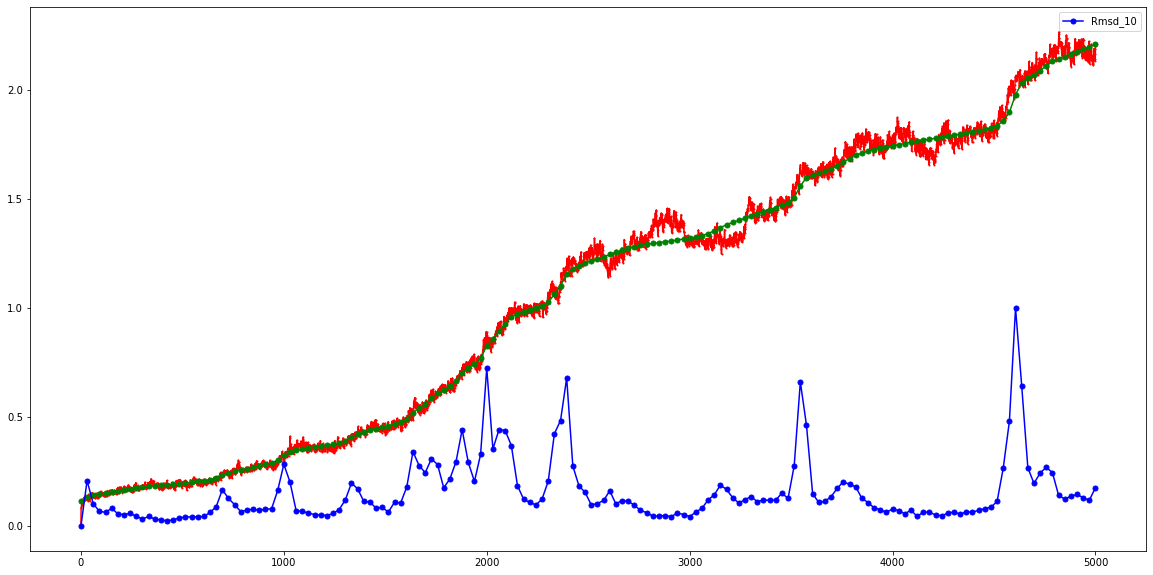

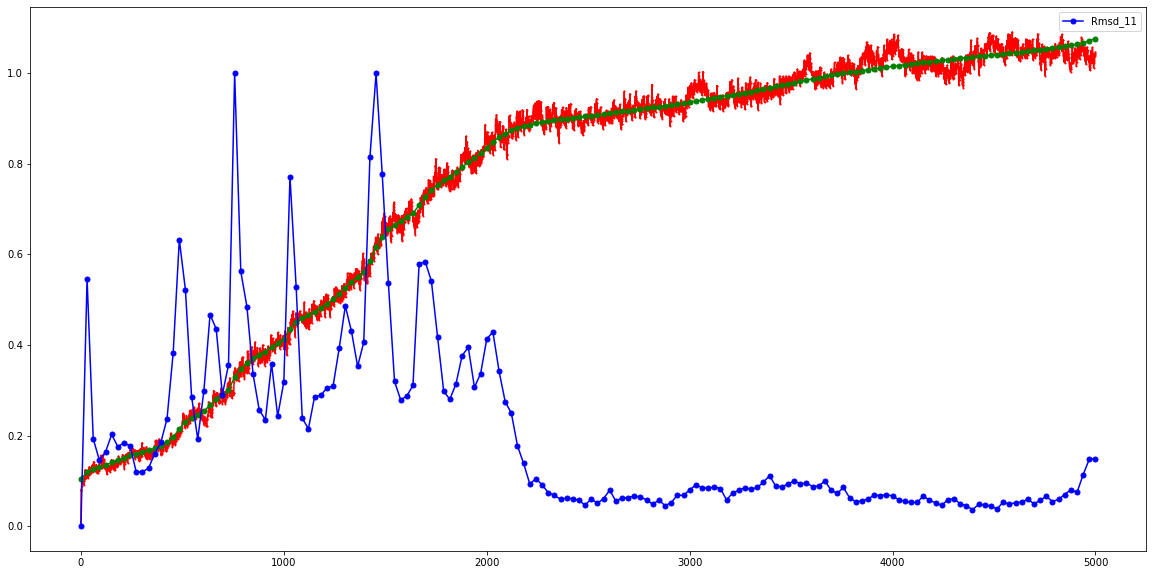

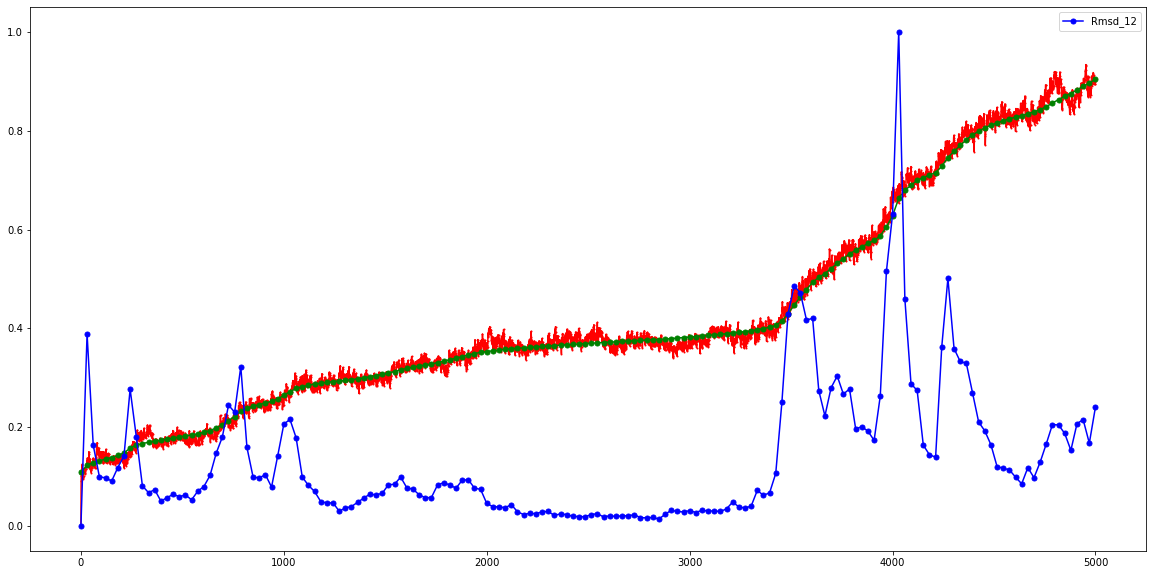

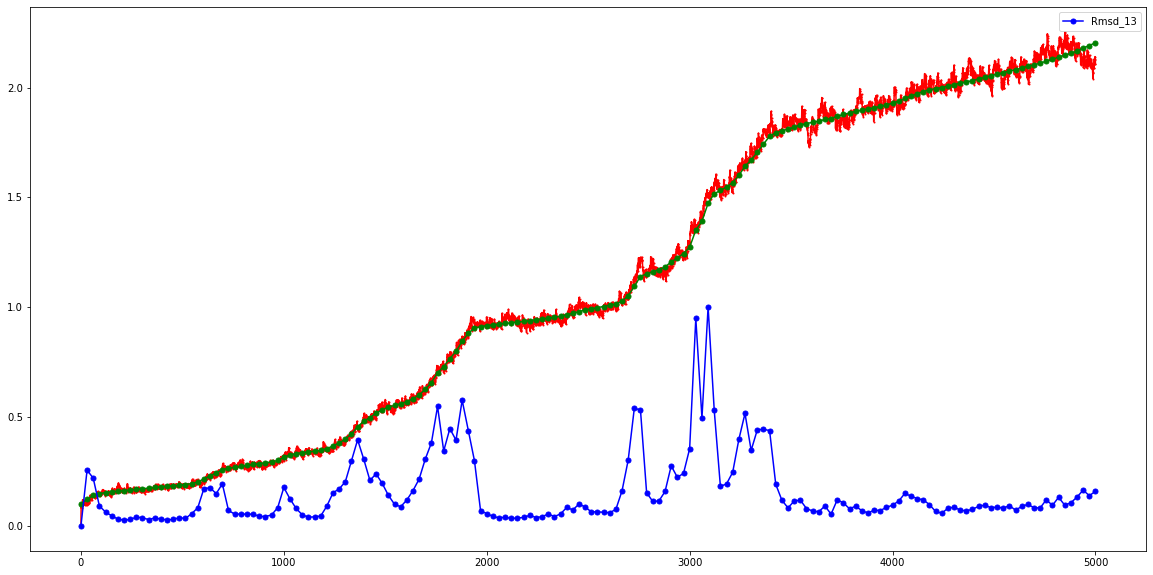

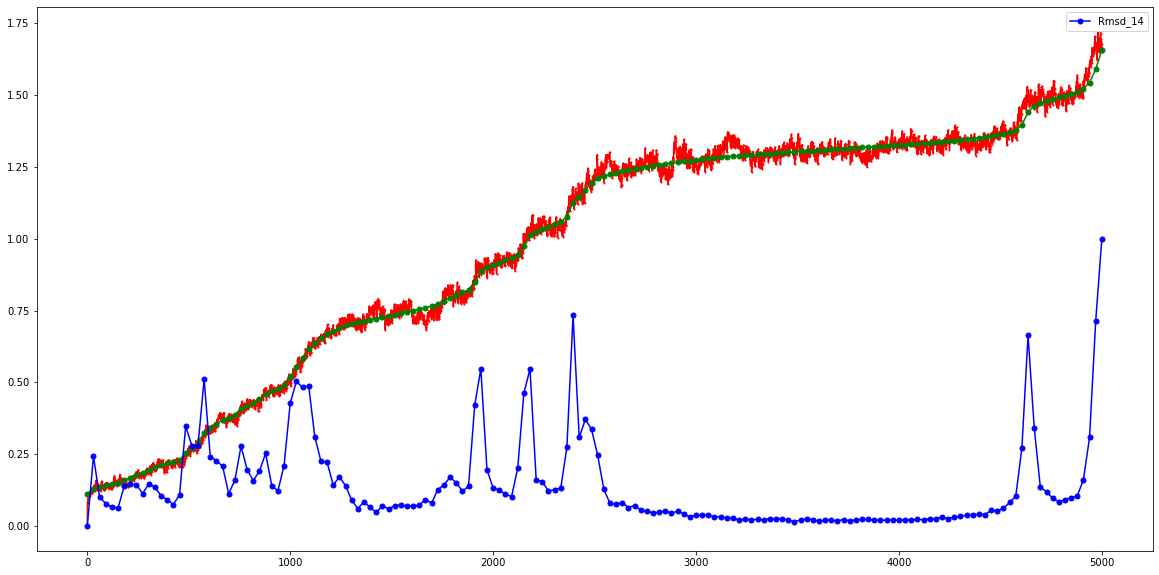

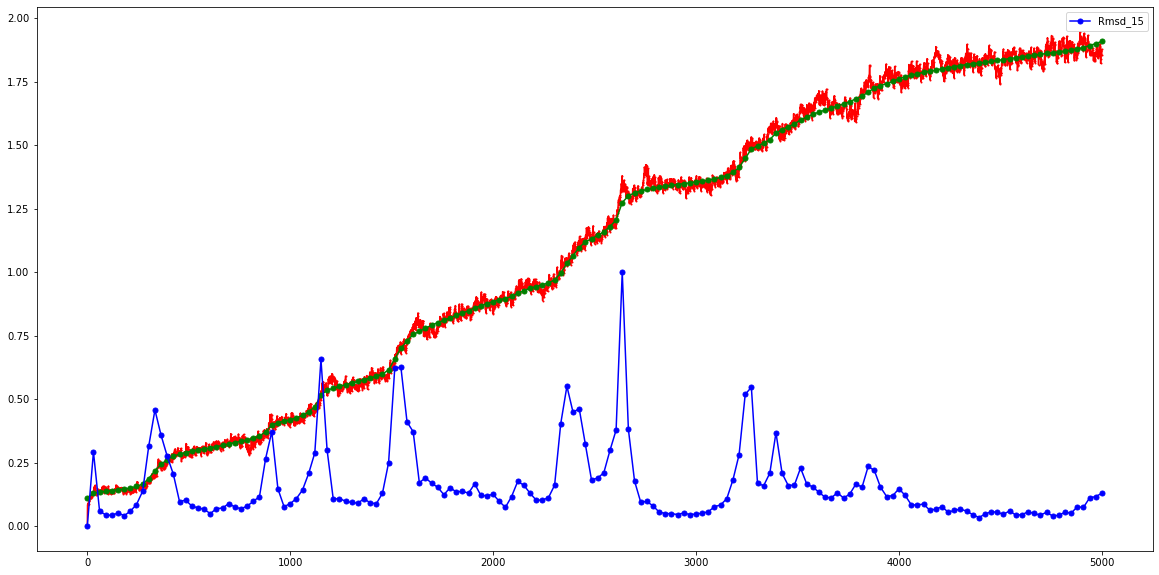

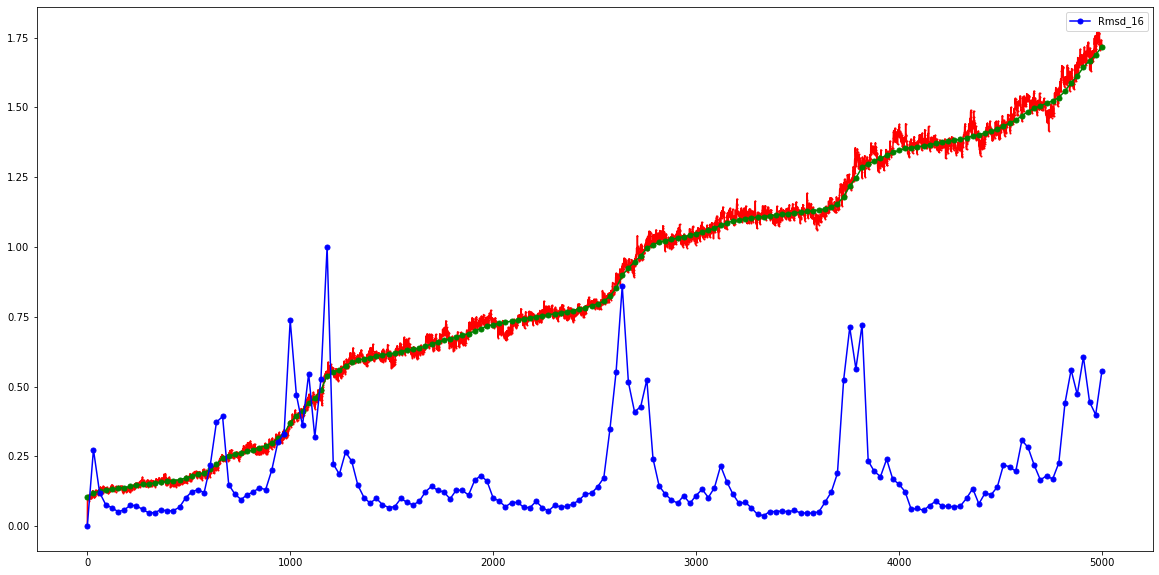

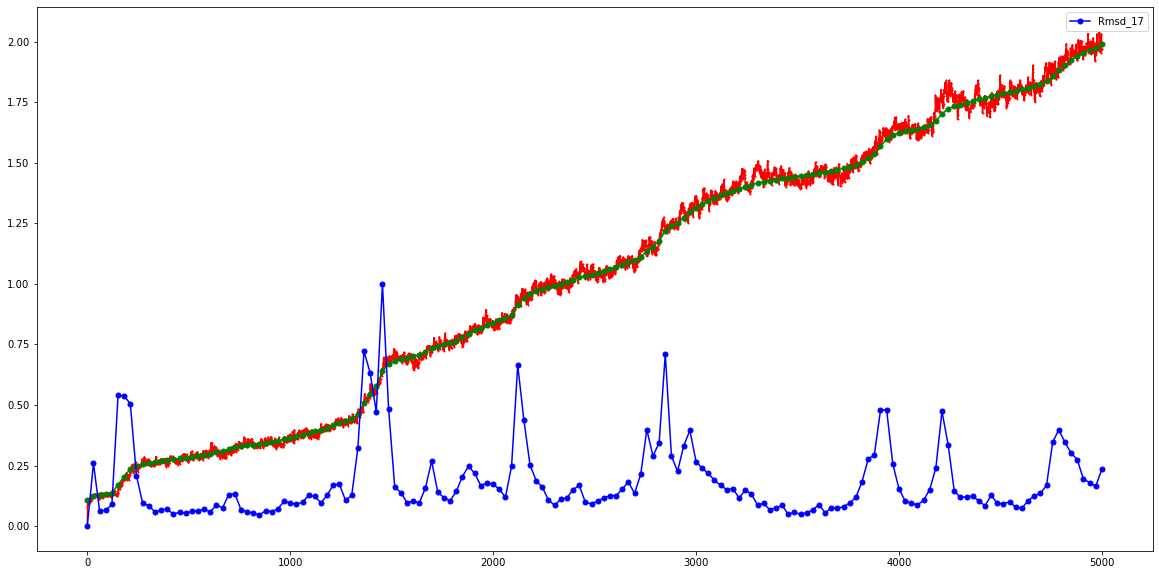

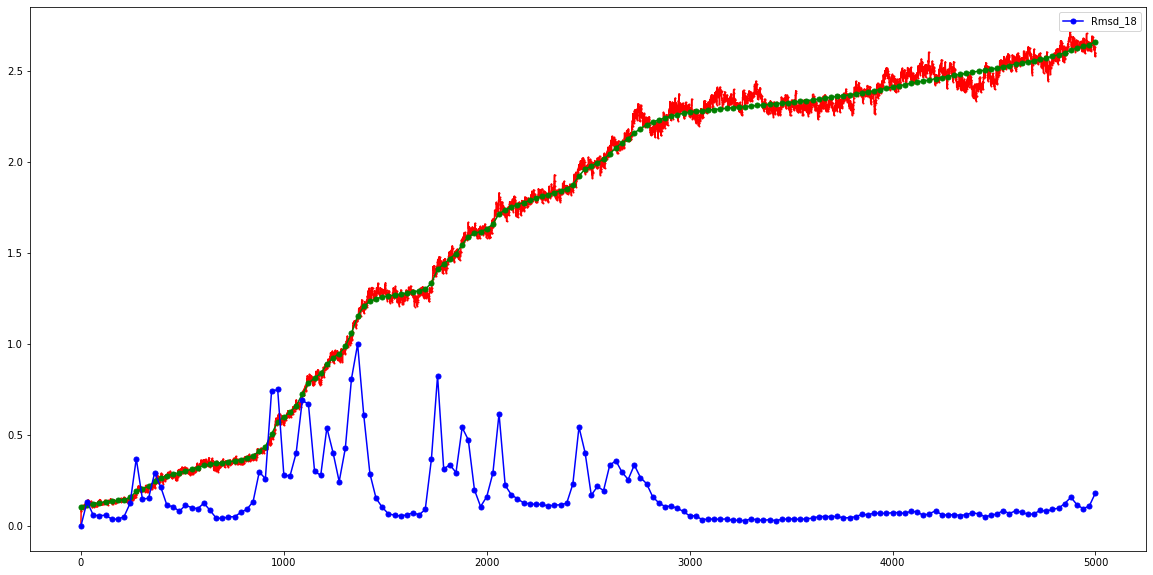

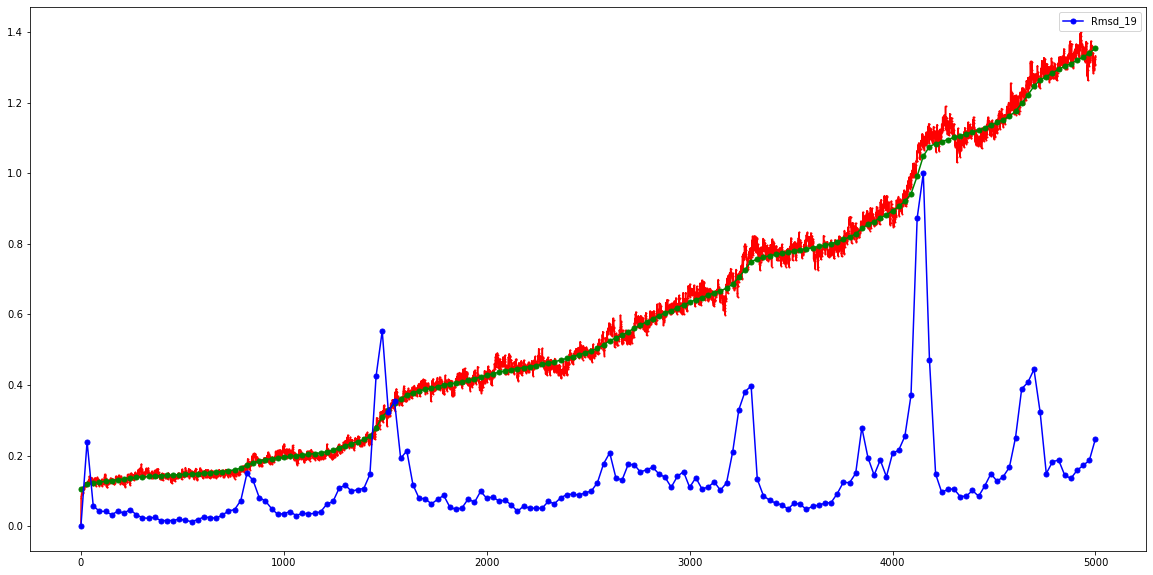

In [33]:
for l in list(sim_RMSD_df):

    #promedio n puntos
    #lowess
    x = np.array(sim_RMSD_df[l])
    y = np.sin(x)
    z = lowess(y, x,frac= 1./2, it=0)
    w = lowess(y, x, frac=1./2)
    W=pd.DataFrame(w)
    plt.figure(figsize=(20,10))
    plt.grid()
    #plt.plot(W[0],'-')
    #plt.plot(x,'--')

    #######

    dato=[]
    a=0
    d=0
    prom=30 #promedio de n

    for i in W[0]:
        d=d+i
        if a==prom:
            dato.append(d/a)
            #print(d/a)
            a=0
            d=0
        a=a+1

    dt = np.linspace(0, 5000, int(5000/prom)) 
    dt_col = np.linspace(0, 5000, int(5000/prom)) 


    #pendiente
    col_df=pd.DataFrame({})
    col=[]
    col.append(0)
    for i in range(len(dato)-1):
            y1=dato[i]
            y2=dato[i+1]
            m=(y2-y1)/2
            col.append(m)
    col_df.insert(0,'0',col)  

    #norm

    sim_min=col_df['0'].min()
    sim_max=col_df['0'].max()
    col_df_nom=((col_df[:]-sim_min)/(sim_max-sim_min))


    #plt
    plt.grid()
    plt.plot(sim_RMSD_df[l],"-ro", markersize=1)
    plt.plot(dt,dato,"-go", markersize=5)
    plt.plot(dt,col_df_nom,"-bo", markersize=5 ,label=str(l))
    plt.legend()
    plt.show